## 第三章 模型搭建和评估-评估

根据之前的模型的建模，我们知道如何运用sklearn这个库来完成建模，以及我们知道了的数据集的划分等等操作。那么一个模型我们怎么知道它好不好用呢？以至于我们能不能放心的使用模型给我的结果呢？那么今天的学习的评估，就会很有帮助。

加载下面的库

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['figure.figsize'] = (10, 6)  # 设置输出图片大小

**任务：加载数据并分割测试集和训练集**

In [4]:
train = pd.read_csv('train.csv')
data = pd.read_csv('clear_data.csv')

In [5]:
from sklearn.model_selection import train_test_split

X = data
y = train['Survived']

# 分层抽样
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# 随机森林
rfc2 = RandomForestClassifier(n_estimators=100, max_depth=5)
rfc2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### 模型评估

* 模型评估是为了知道模型的泛化能力。
* 交叉验证（cross-validation）是一种评估泛化性能的统计学方法，它比单次划分训练集和测试集的方法更加稳定、全面。
* 在交叉验证中，数据被多次划分，并且需要训练多个模型。
* 最常用的交叉验证是 k 折交叉验证（k-fold cross-validation），其中 k 是由用户指定的数字，通常取 5 或 10。
* 准确率（precision）度量的是被预测为正例的样本中有多少是真正的正例
* 召回率（recall）度量的是正类样本中有多少被预测为正类
* f-分数是准确率与召回率的调和平均

【思考】：将上面的概念进一步的理解，大家可以做一下总结

泛化能力：机器学习算法对新鲜样本的适应能力

#### 任务一：交叉验证
* 用10折交叉验证来评估之前的逻辑回归模型
* 计算交叉验证精度的平均值

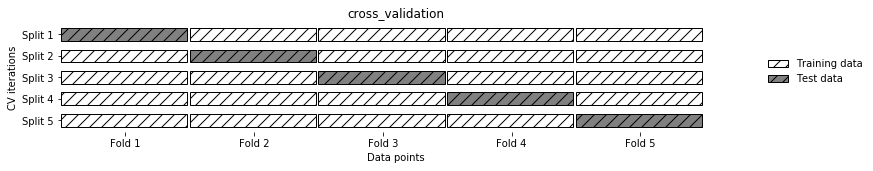

In [8]:
#提示：交叉验证
Image('Snipaste_2020-01-05_16-37-56.png')

#### 提示4
* 交叉验证在sklearn中的模块为`sklearn.model_selection`

In [13]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html
from sklearn.model_selection import cross_val_score

# 根据交叉验证评分
# cv设置褶皱数
scores_10 = cross_val_score(rfc2, X_train, y_train, cv=10)
scores_10

array([0.85074627, 0.79104478, 0.85074627, 0.79104478, 0.85074627,
       0.86567164, 0.79104478, 0.80597015, 0.8030303 , 0.75757576])

In [14]:
# 平均交叉验证分数
print("Average cross-validation score 10: {:.2f}".format(scores_10.mean()))

Average cross-validation score 10: 0.82


In [11]:
scores_5 = cross_val_score(rfc2, X_train, y_train, cv=5)
scores_5

array([0.82089552, 0.82835821, 0.84328358, 0.79699248, 0.7443609 ])

In [15]:
# 平均交叉验证分数
print("Average cross-validation score 5: {:.2f}".format(scores_5.mean()))

Average cross-validation score 5: 0.81


#### 思考4
* k折越多的情况下会带来什么样的影响？

#### 任务二：混淆矩阵
* 计算二分类问题的混淆矩阵
* 计算精确率、召回率以及f-分数

【思考】什么是二分类问题的混淆矩阵，理解这个概念，知道它主要是运算到什么任务中的

二分类：表示分类任务中有两个类别

二分类问题的混淆矩阵是一个二维方阵，用于评估二分类问题的好坏，主要运用于二分类任务中

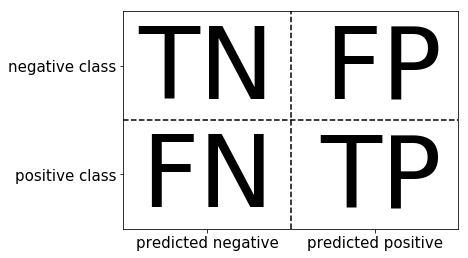

In [16]:
#提示：混淆矩阵
Image('Snipaste_2020-01-05_16-38-26.png')

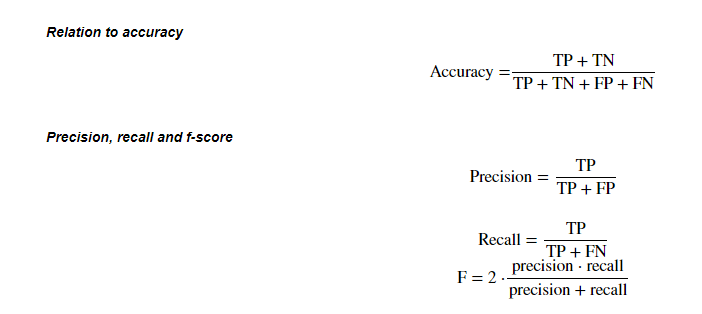

In [17]:
#提示：准确率 (Accuracy),精确度（Precision）,Recall,f-分数计算方法
Image('Snipaste_2020-01-05_16-39-27.png')

#### 提示5
* 混淆矩阵的方法在sklearn中的`sklearn.metrics`模块
* 混淆矩阵需要输入真实标签和预测标签
* 精确率、召回率以及f-分数可使用`classification_report`模块

In [19]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix

In [20]:
# 模型预测结果
pred_train = rfc2.predict(X_train)

# 混淆矩阵
confusion_matrix(y_train, pred_train)

array([[383,  29],
       [ 62, 194]], dtype=int64)

In [22]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import classification_report

print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       412
           1       0.87      0.76      0.81       256

    accuracy                           0.86       668
   macro avg       0.87      0.84      0.85       668
weighted avg       0.86      0.86      0.86       668



【思考】
* 如果自己实现混淆矩阵的时候该注意什么问题

#### 任务三：ROC曲线
* 绘制ROC曲线

【思考】什么是ROC曲线，ROC曲线的存在是为了解决什么问题？

ROC曲线：接收者操作特征曲线，曲线上每个点反映着对同一信号刺激的感受性

ROC曲线的存在主要用于衡量模型的泛化性能，即分类效果的好坏

参考：https://www.jianshu.com/p/c61ae11cc5f6

#### 提示6
* ROC曲线在sklearn中的模块为`sklearn.metrics`
* ROC曲线下面所包围的面积越大越好

In [31]:
y_score = rfc2.fit(X_train, y_train).predict_proba(X_test)
y_score[:, 1]

array([0.11494356, 0.44514357, 0.214234  , 0.35679146, 0.50144256,
       0.24335901, 0.51892289, 0.12080014, 0.13390747, 0.10046506,
       0.09317267, 0.26585319, 0.27380806, 0.17206243, 0.85287866,
       0.89027665, 0.17525535, 0.19108856, 0.60828956, 0.79909298,
       0.95084715, 0.89712731, 0.12200383, 0.10172779, 0.12664258,
       0.89886973, 0.97631182, 0.62054114, 0.11780964, 0.09725997,
       0.09428106, 0.17280337, 0.15530657, 0.21964652, 0.9272455 ,
       0.10702555, 0.50739488, 0.97647943, 0.34442935, 0.09137096,
       0.12182824, 0.3374959 , 0.62937186, 0.32719322, 0.09497934,
       0.38905683, 0.95295958, 0.64167881, 0.25786411, 0.10024047,
       0.57068562, 0.10268969, 0.34884969, 0.21892154, 0.30762213,
       0.28273238, 0.09400318, 0.85534883, 0.1284657 , 0.75574794,
       0.09497934, 0.11386892, 0.11626163, 0.10977425, 0.09341494,
       0.4202939 , 0.8650447 , 0.23223699, 0.81627793, 0.10190429,
       0.08246661, 0.12656852, 0.37098368, 0.09497934, 0.48752

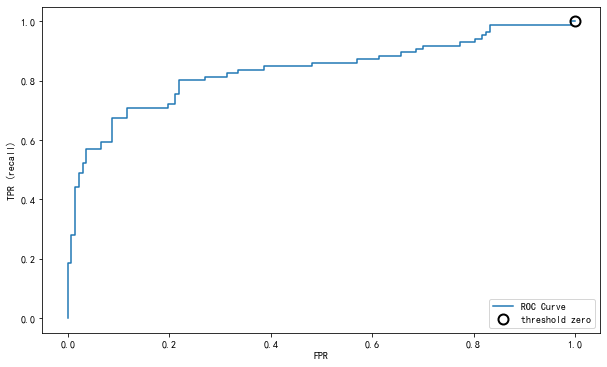

In [32]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# 找到最接近于0的阈值
close_zero = np.argmin(np.abs(thresholds)) # 取得最接近0阈值的索引值
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


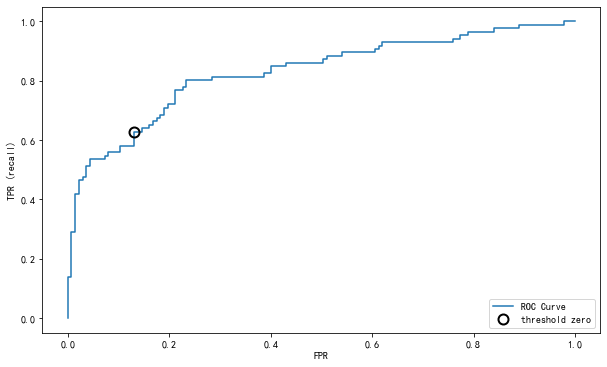

In [33]:
# 训练模型
lr = LogisticRegression(C=100)
lr.fit(X_train, y_train)

fpr, tpr, thresholds = roc_curve(y_test, lr.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# 找到最接近于0的阈值
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

#### 思考6
* 对于多分类问题如何绘制ROC曲线

【思考】你能从这条OCR曲线的到什么信息？这些信息可以做什么？

下方面积越大，预测准确率越高

曲线越接近左上角，预测准确率越高